In [7]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import tensorflow as tf

In [15]:
file_path = 'Testing.csv'
df = pd.read_csv(file_path)
print(df.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

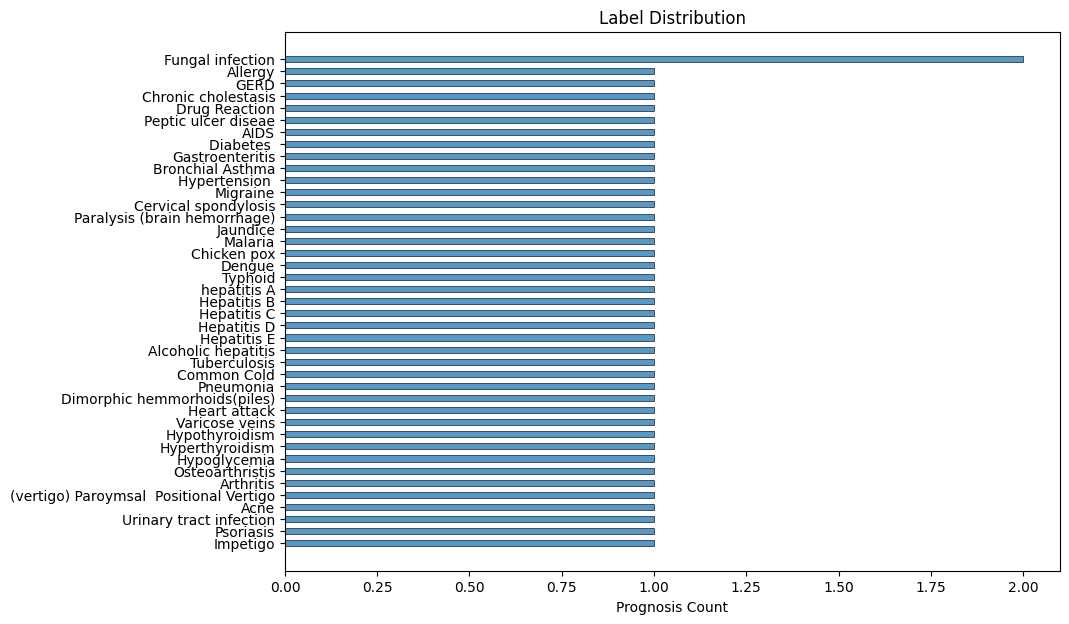

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the dataset
plt.figure(figsize=(10, 7))
sns.histplot(data=df, y="prognosis", shrink=0.5)
plt.yticks(size=10)
plt.ylabel("")
plt.xlabel("Prognosis Count")
plt.title("Label Distribution")
plt.show()


In [21]:
shuffled_df = df.sample(frac=1, random_state=50)  # Shuffle the entire dataset

# Split into training and testing sets
train_size = int(0.8 * len(shuffled_df))
train = shuffled_df[:train_size]
test = shuffled_df[train_size:]

# Separate features and target variable
X_train = train.drop("prognosis", axis=1)
y_train = train["prognosis"]

X_test = test.drop("prognosis", axis=1)
y_test = test["prognosis"]


In [22]:
len(y_train.unique())

32

In [23]:
l_enc = LabelEncoder()
y_train = l_enc.fit_transform(y_train)
y_test = l_enc.fit_transform(y_test)

In [25]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    mse = history.history["accuracy"]
    val_mse = history.history["val_accuracy"]
    
    epochs = range(1,(len(history.history["loss"])+1),1)
    
    plt.subplots(1,2,figsize=(10,4))

     # Plot loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.grid(visible=True)
    plt.legend()

    # Plot accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, mse, label="Training Accuracy")
    plt.plot(epochs, val_mse, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.grid(visible=True)
    plt.legend()
    
    plt.show()

In [26]:
X_train.shape

(33, 132)

In [27]:
# Create a tf model
tf.random.set_seed(50)

model = tf.keras.models.Sequential([

    # Input
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(200, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.6),
    
#     # FC 1
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(400, activation="relu",use_bias=True,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.Dropout(0.6),
      # FC 2
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(150, activation="relu",use_bias=True,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    
    # Output
    tf.keras.layers.Dense(41, activation="softmax")
])
# Use a learning_rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, decay_steps=100, decay_rate=0.9)

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Create EarlyStop callback
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=5,restore_best_weights=True)

# Fit the model
history = model.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,
                    validation_data=(X_test,y_test),callbacks=[es])


Epoch 1/100


2/2 [==============================] - 11s 1s/step - loss: 8.0510 - accuracy: 0.0303 - val_loss: 6.9707 - val_accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 210ms/step - loss: 7.5085 - accuracy: 0.0303 - val_loss: 6.9057 - val_accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 172ms/step - loss: 7.3938 - accuracy: 0.0606 - val_loss: 6.8463 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 201ms/step - loss: 7.1168 - accuracy: 0.0000e+00 - val_loss: 6.7887 - val_accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 172ms/step - loss: 7.1460 - accuracy: 0.0303 - val_loss: 6.7361 - val_accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 219ms/step - loss: 6.8987 - accuracy: 0.0000e+00 - val_loss: 6.6875 - val_accuracy: 0.0000e+00


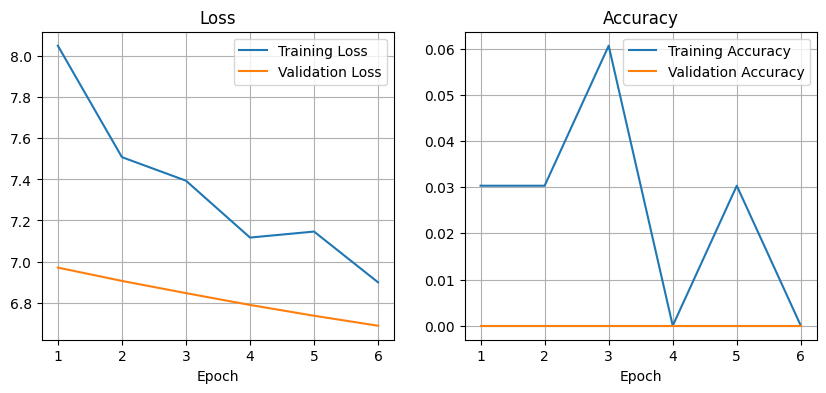

Validation Loss: 6.97066068649292, Validation Accuracy: 0.0


In [28]:
# Plot loss and accuracy
plot_loss_curves(history)

val_loss, val_accuracy = model.evaluate(X_test, y_test,verbose=0)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

<Figure size 1500x1000 with 0 Axes>

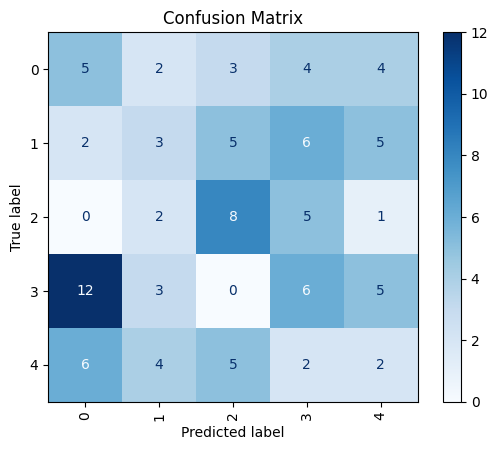

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example: Generate synthetic data (replace this with your actual data)
np.random.seed(42)
y_true = np.random.randint(0, 5, size=100)  # Example true labels (5 classes)
y_pred = np.random.randint(0, 5, size=100)  # Example predicted labels

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Get unique class labels
class_labels = np.unique(np.concatenate((y_true, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(15, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')  # 'd' for integer format
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()
